In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

In [4]:
data = pd.read_csv('..\..\listings.csv') #Importing Dataset
        
data_Numeric = pd.DataFrame(data[["id","host_total_listings_count","zipcode","latitude","longitude","accommodates","bathrooms","bedrooms","beds","price","weekly_price","monthly_price","security_deposit","cleaning_fee","guests_included","extra_people","minimum_nights","maximum_nights","availability_30","availability_90","availability_365","number_of_reviews","review_scores_rating","review_scores_accuracy","review_scores_cleanliness","review_scores_checkin","review_scores_communication","review_scores_location","review_scores_value","reviews_per_month"]])

for var in data_Numeric:
    if(data_Numeric[var].dtypes == "object"):
        data_Numeric[var] = data_Numeric[var].str.replace(',', '').str.replace('$', '')
        data_Numeric[var] = data_Numeric[var].apply(pd.to_numeric,errors='coerce')

from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=9)
data_Numeric_changed = pd.DataFrame(imputer.fit_transform(data_Numeric), columns =data_Numeric.columns)


price_changed = pd.DataFrame(data_Numeric_changed["price"])
reviewscore_changed = pd.DataFrame(data_Numeric_changed["review_scores_rating"])

useless = ["zipcode","latitude","longitude"]
data_Numeric_changed=data_Numeric_changed.drop(axis=1,columns=useless)


data_Numeric_changed.head()

,id,host_total_listings_count,accommodates,bathrooms,bedrooms,beds,price,weekly_price,monthly_price,security_deposit,...,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
0,241032.0,3.0,4.0,1.0,1.0,1.0,85.0,531.777778,1701.888889,171.666667,...,346.0,207.0,95.0,10.000000,10.000000,10.000000,10.000000,9.000000,10.000000,4.070000
1,953595.0,6.0,4.0,1.0,1.0,1.0,150.0,1000.000000,3000.000000,100.000000,...,291.0,43.0,96.0,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.480000
2,3308979.0,2.0,11.0,4.5,5.0,7.0,975.0,644.444444,2281.666667,1000.000000,...,220.0,20.0,97.0,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.150000
3,7421966.0,1.0,3.0,1.0,0.0,2.0,100.0,650.000000,2300.000000,277.777778,...,143.0,0.0,96.0,9.777778,9.777778,9.777778,9.666667,8.555556,9.333333,1.848889
4,278830.0,2.0,6.0,2.0,3.0,3.0,450.0,898.666667,3177.111111,700.000000,...,365.0,38.0,92.0,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,0.890000


In [3]:
from sklearn.model_selection import train_test_split

data_Numeric_Train, data_Numeric_test,price_Train, price_test,reviewscore_Train, reviewscore_test = train_test_split(data_Numeric_changed,price_changed,reviewscore_changed,test_size = 0.25)

print("Train Set :", data_Numeric_Train.shape, price_Train.shape, reviewscore_Train.shape)
print("Test Set  :", data_Numeric_test.shape, price_test.shape, reviewscore_test.shape)

Train Set : (2863, 27) (2863, 1) (2863, 1)
Test Set  : (955, 27) (955, 1) (955, 1)


price                          0.047755
id                             0.073736
host_total_listings_count     -0.062709
accommodates                  -0.014823
bathrooms                      0.031874
bedrooms                       0.017831
beds                           0.000046
weekly_price                   0.030987
monthly_price                  0.046301
security_deposit               0.037643
cleaning_fee                   0.002536
guests_included                0.000651
extra_people                  -0.028558
minimum_nights                -0.000261
maximum_nights                -0.062040
availability_30               -0.042072
availability_90               -0.033486
availability_365              -0.041214
number_of_reviews              0.016950
review_scores_rating           1.000000
review_scores_accuracy         0.590159
review_scores_cleanliness      0.602394
review_scores_checkin          0.507252
review_scores_communication    0.508824
review_scores_location         0.362678


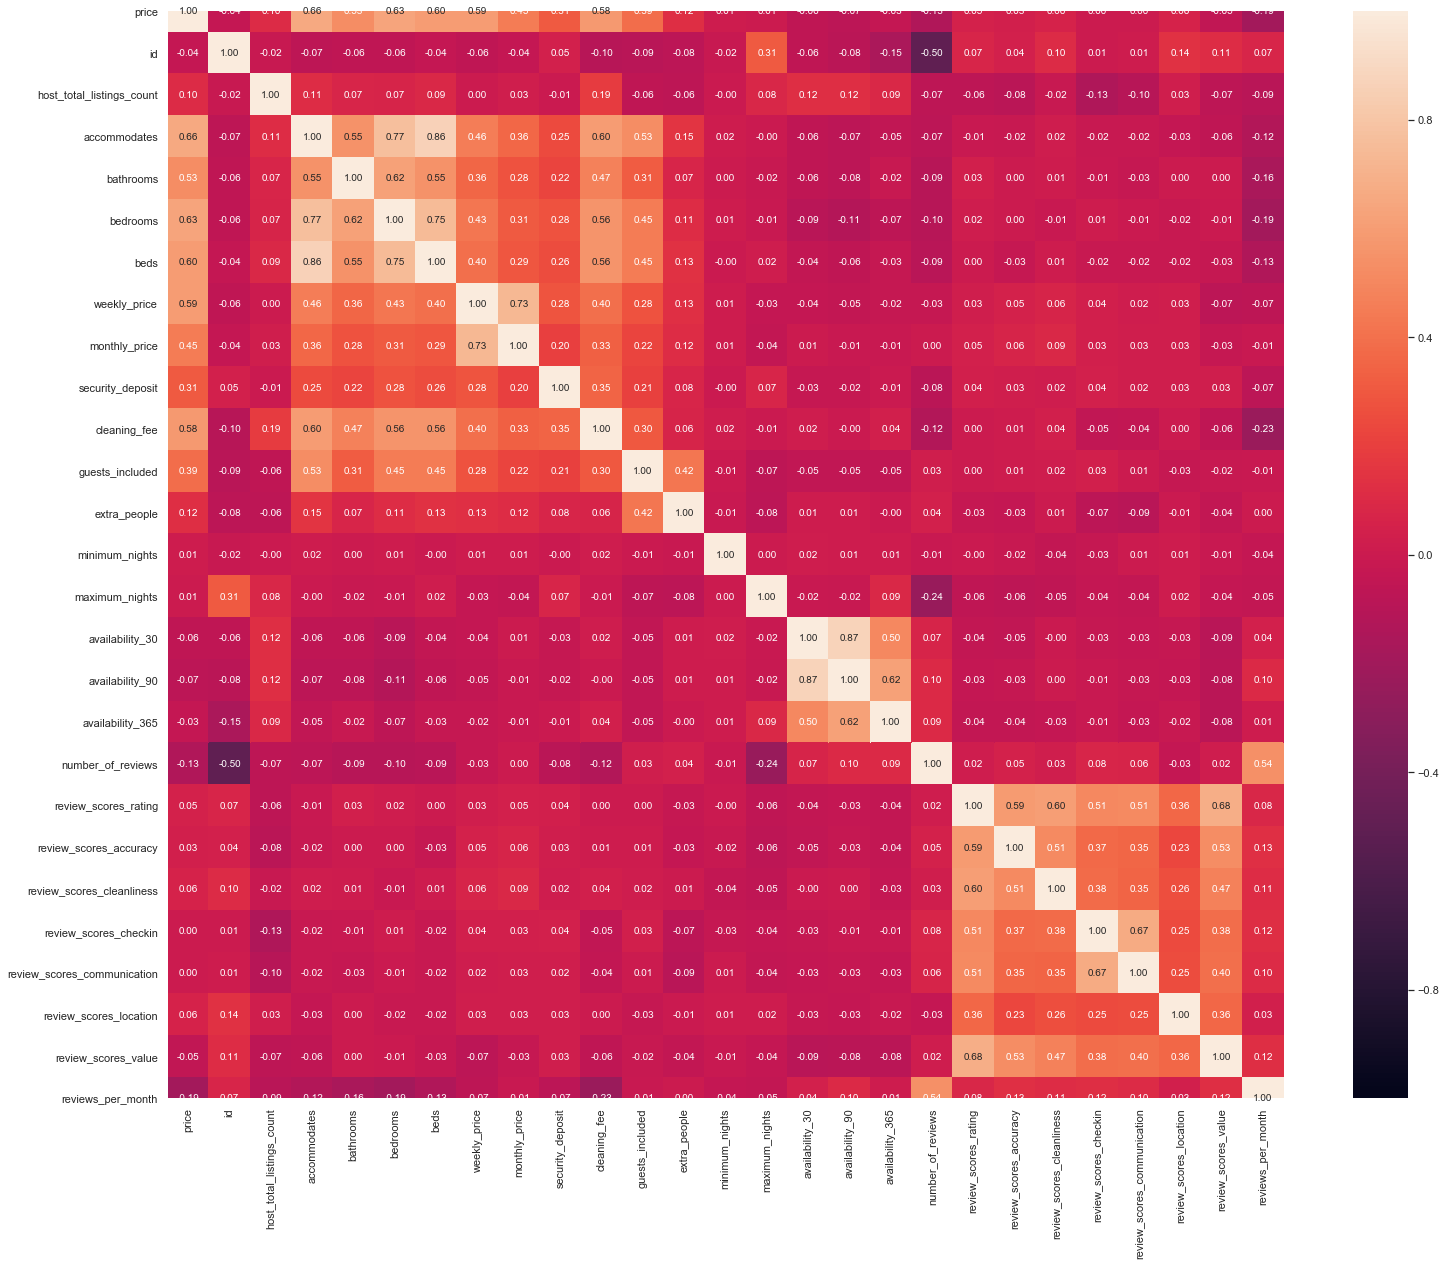

In [4]:
# Correlation between Response and the Predictors
trainDF = pd.concat([price_Train, data_Numeric_Train.reindex(index=data_Numeric_Train.index)], sort = False)

f, axes = plt.subplots(1, 1, figsize=(25, 20))
sb.heatmap(trainDF.corr(), vmin = -1, vmax = 1, annot = True, fmt = ".2f")

trainDF.corr()['review_scores_rating']

In [5]:
count = 0
highrelation = []
for var in trainDF.corr():
    if(trainDF.corr()['price'][count] > 0.3):
        print("Variables that are Highly Related:",var)
        if(var != "price"):
            highrelation.append(var) 
    count+=1

Multi_High_Related_Train = {}    
Multi_High_Related_Test = {}
for var in highrelation:
    Multi_High_Related_Train[var] = pd.DataFrame(data_Numeric_Train[[var]])
    Multi_High_Related_Test[var] = pd.DataFrame(data_Numeric_test[[var]])




Variables that are Highly Related: price
Variables that are Highly Related: accommodates
Variables that are Highly Related: bathrooms
Variables that are Highly Related: bedrooms
Variables that are Highly Related: beds
Variables that are Highly Related: weekly_price
Variables that are Highly Related: monthly_price
Variables that are Highly Related: security_deposit
Variables that are Highly Related: cleaning_fee
Variables that are Highly Related: guests_included


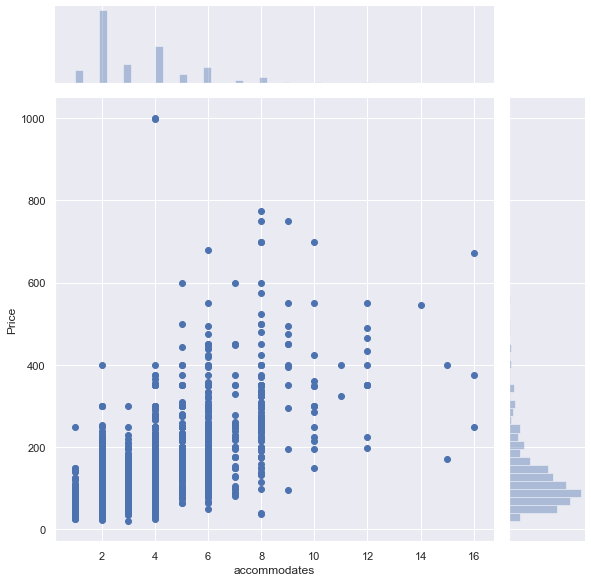

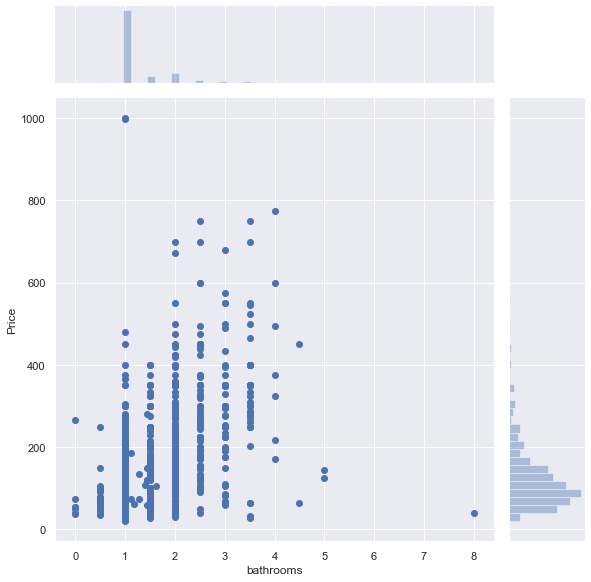

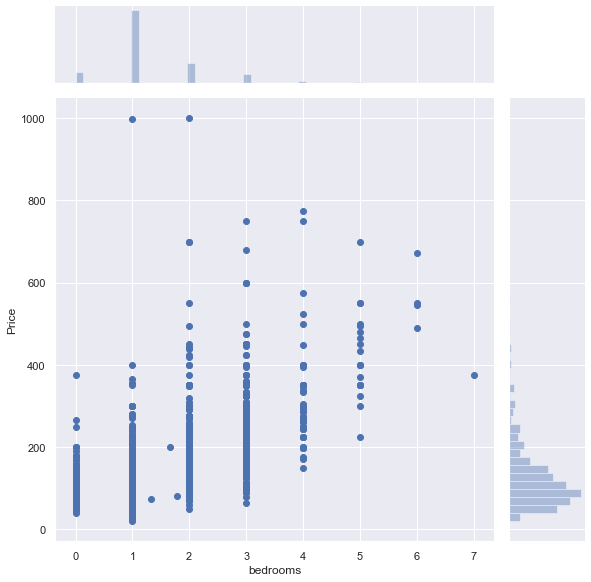

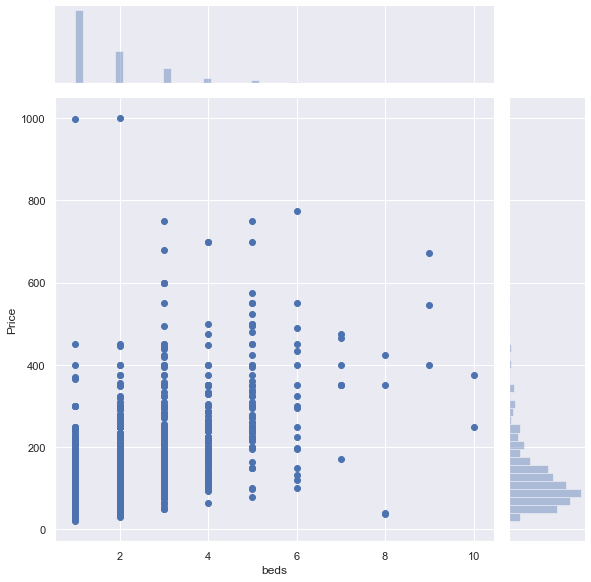

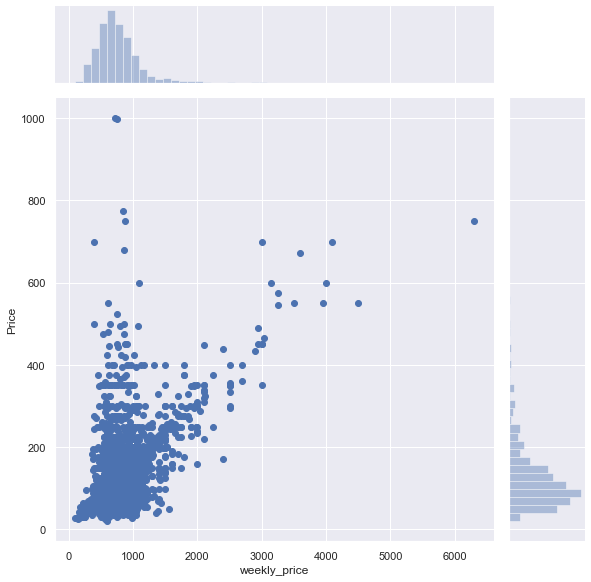

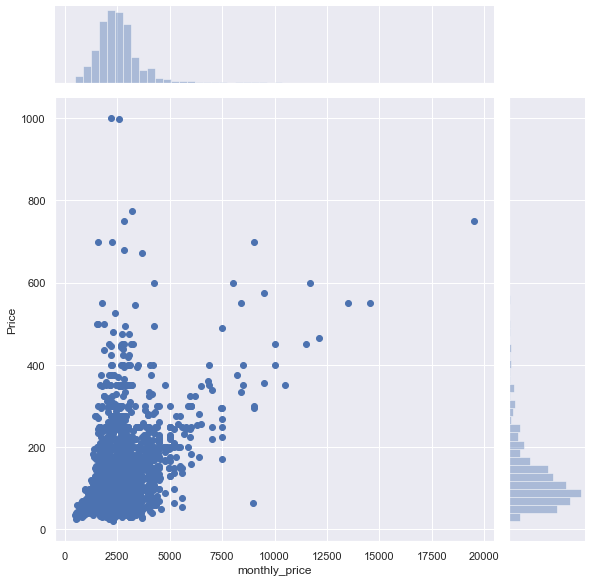

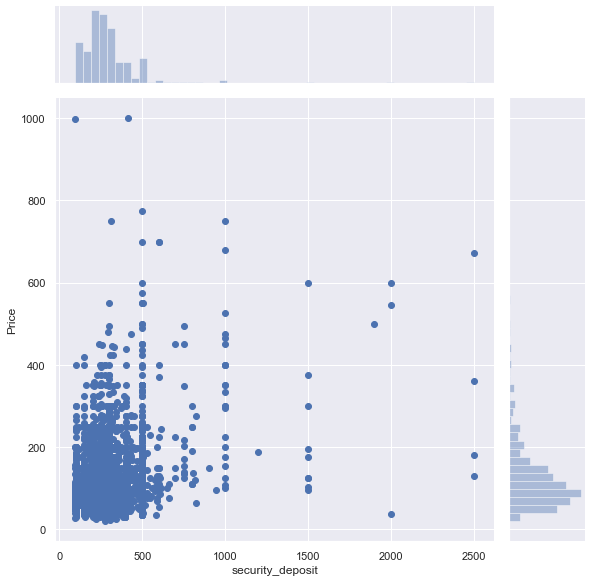

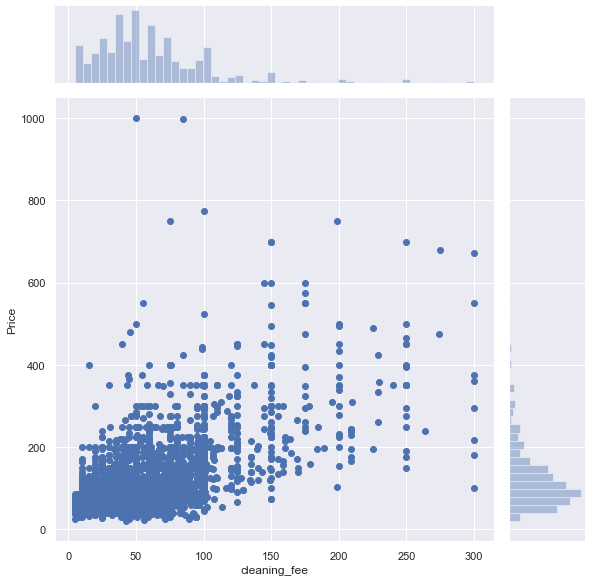

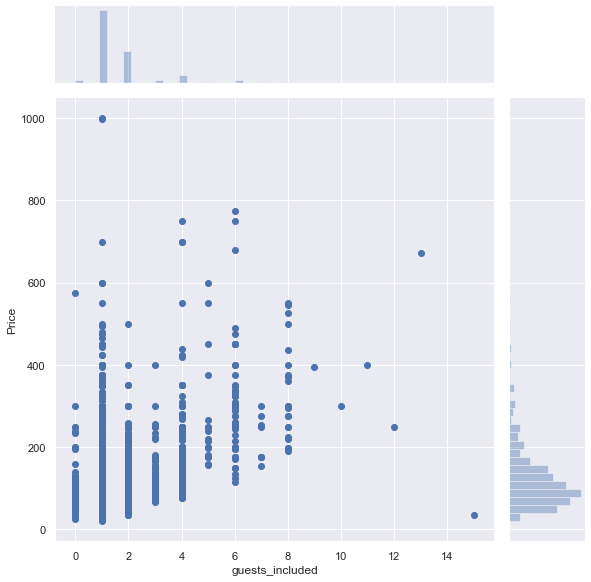

In [6]:
for var in Multi_High_Related_Train:
    x = sb.jointplot(Multi_High_Related_Train[var], price_Train, height = 8)
    x.set_axis_labels(xlabel=var, ylabel='Price')
    

In [7]:
# Import LinearRegression model from Scikit-Learn
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

index = 0
linreg = {}

        

for var in Multi_High_Related_Train:
    linreg[var] = Lasso()
    linreg[var].fit(Multi_High_Related_Train[var], price_Train)
 

In [8]:
index = 0
price_train_pred = {}
price_test_pred = {}

for var in linreg:
    price_train_pred[var]={} 
    price_test_pred[var]={} 



for var in linreg:
    price_train_pred[var] = linreg[var].predict(Multi_High_Related_Train[var])
    price_test_pred[var] = linreg[var].predict(Multi_High_Related_Test[var])


In [9]:
# Import mean_squared_error from sklearn
from sklearn.metrics import mean_squared_error


for var in price_train_pred:
    print("For [",var,"]")
    print("Train Explained Variance (R^2) \t:", linreg[var].score(Multi_High_Related_Train[var], price_Train))
    print("Test Explained Variance (R^2) \t:", linreg[var].score(Multi_High_Related_Test[var], price_test))
    print()


For [ accommodates ]
Train Explained Variance (R^2) 	: 0.44041044525190665
Test Explained Variance (R^2) 	: 0.3833994061289898

For [ bathrooms ]
Train Explained Variance (R^2) 	: 0.27729357476953587
Test Explained Variance (R^2) 	: 0.23460778007408

For [ bedrooms ]
Train Explained Variance (R^2) 	: 0.4008450569323553
Test Explained Variance (R^2) 	: 0.37278739455153

For [ beds ]
Train Explained Variance (R^2) 	: 0.360733255920491
Test Explained Variance (R^2) 	: 0.311420502661938

For [ weekly_price ]
Train Explained Variance (R^2) 	: 0.3526524962087545
Test Explained Variance (R^2) 	: 0.3811304671229504

For [ monthly_price ]
Train Explained Variance (R^2) 	: 0.2018872274203073
Test Explained Variance (R^2) 	: 0.2623316455174264

For [ security_deposit ]
Train Explained Variance (R^2) 	: 0.09721201047232231
Test Explained Variance (R^2) 	: 0.03418275769006496

For [ cleaning_fee ]
Train Explained Variance (R^2) 	: 0.3403912915016558
Test Explained Variance (R^2) 	: 0.28300156715799

In [80]:
#try predicting

try_Pred = data_Numeric_changed[data_Numeric_changed["id"].isin(["4454295"])]
data_Numeric_changed.head()

,id,host_total_listings_count,accommodates,bathrooms,bedrooms,beds,price,security_deposit,cleaning_fee,guests_included,...,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
1,953595,6.0,4,1.0,1.0,1.0,150.0,100.0,40.0,1,...,291,43,96.0,10.0,10.0,10.0,10.0,10.0,10.0,1.48
9,2493658,6.0,4,1.0,1.0,1.0,150.0,100.0,40.0,1,...,324,32,97.0,10.0,10.0,10.0,10.0,10.0,9.0,1.55
11,4454295,1.0,2,1.0,1.0,1.0,99.0,500.0,150.0,1,...,229,8,97.0,10.0,10.0,9.0,10.0,10.0,9.0,0.98
12,3883392,1.0,4,1.0,2.0,3.0,245.0,300.0,95.0,1,...,362,13,98.0,10.0,10.0,10.0,10.0,10.0,10.0,0.92
32,5978498,1.0,4,3.0,3.0,2.0,175.0,200.0,80.0,1,...,213,8,88.0,9.0,9.0,9.0,9.0,10.0,9.0,1.31


In [81]:
data_needed = pd.DataFrame(try_Pred[Multi_High_Related_Train[0][3].columns])
prediction = linreg[0][3].predict(data_needed)
print("Predicted:",prediction)
print("Actual:", try_Pred['price'])

Predicted: [[177.27361822]]
Actual: 11    99.0
Name: price, dtype: float64
